# **Esguerra, Nashrudin Maverick A.**
# **BSCS-IS-3B**

# **Assessment Task: Predicting Feedback on Online Food Orders Using Logistic Regression**






# **1. Data Loading and Preprocessing**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load the dataset
df = pd.read_csv("onlinefoods.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Encode categorical variables using one-hot encoding
encoded_df = pd.get_dummies(df, columns=['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications'])

# Drop the original categorical columns
encoded_df.drop(['Feedback'], axis=1, inplace=True)

# Display the encoded dataset
print(encoded_df.head())

# Select features based on context and preliminary analysis

selected_features = ['Age', 'Monthly Income', 'Family size', 'Gender_Female', 'Gender_Male', 'Marital Status_Married', 'Marital Status_Prefer not to say', 'Occupation_Employee', 'Occupation_House wife', 'Occupation_Self Employeed', 'Educational Qualifications_Graduate', 'Educational Qualifications_Ph.D', 'Educational Qualifications_Post Graduate', 'Educational Qualifications_School', 'Educational Qualifications_Uneducated']

# Create a new DataFrame with selected features
selected_df = encoded_df[selected_features]

# Display the selected features
print(selected_df.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

# **2. Exploratory Data Analysis (EDA)**

Descriptive Statistics:
               Age  Family size  Gender_Female  Gender_Male  \
count  388.000000   388.000000     388.000000   388.000000   
mean    24.628866     3.280928       0.427835     0.572165   
std      2.975593     1.351025       0.495404     0.495404   
min     18.000000     1.000000       0.000000     0.000000   
25%     23.000000     2.000000       0.000000     0.000000   
50%     24.000000     3.000000       0.000000     1.000000   
75%     26.000000     4.000000       1.000000     1.000000   
max     33.000000     6.000000       1.000000     1.000000   

       Marital Status_Married  Marital Status_Prefer not to say  \
count              388.000000                        388.000000   
mean                 0.278351                          0.030928   
std                  0.448766                          0.173346   
min                  0.000000                          0.000000   
25%                  0.000000                          0.000000   
50%           

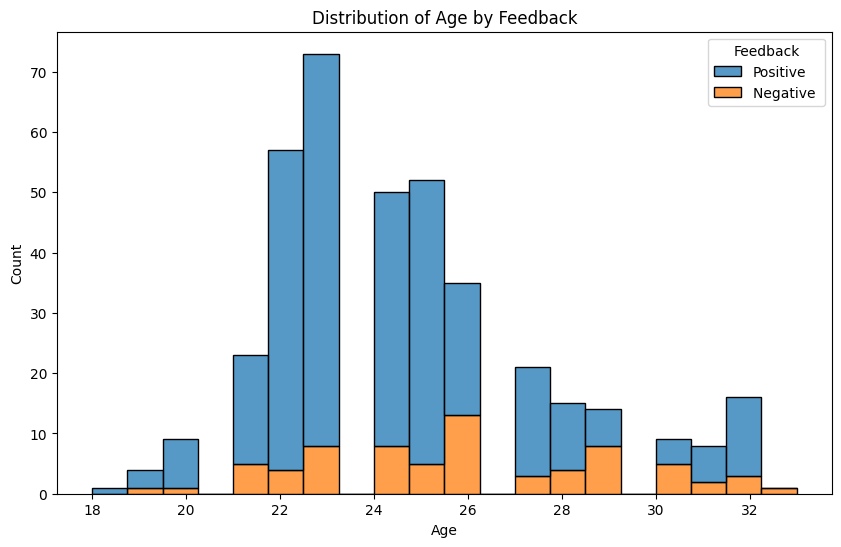

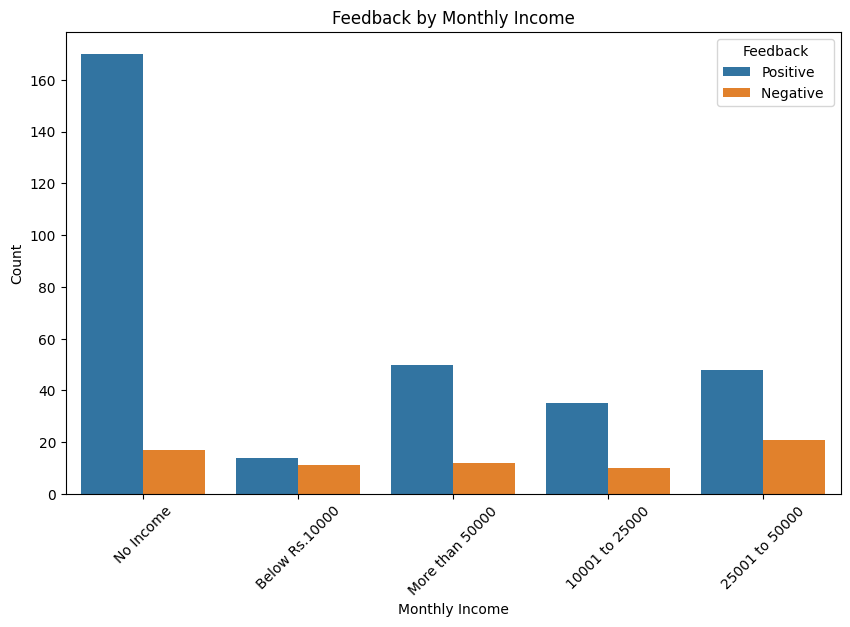

<ipython-input-5-896664cc7551>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


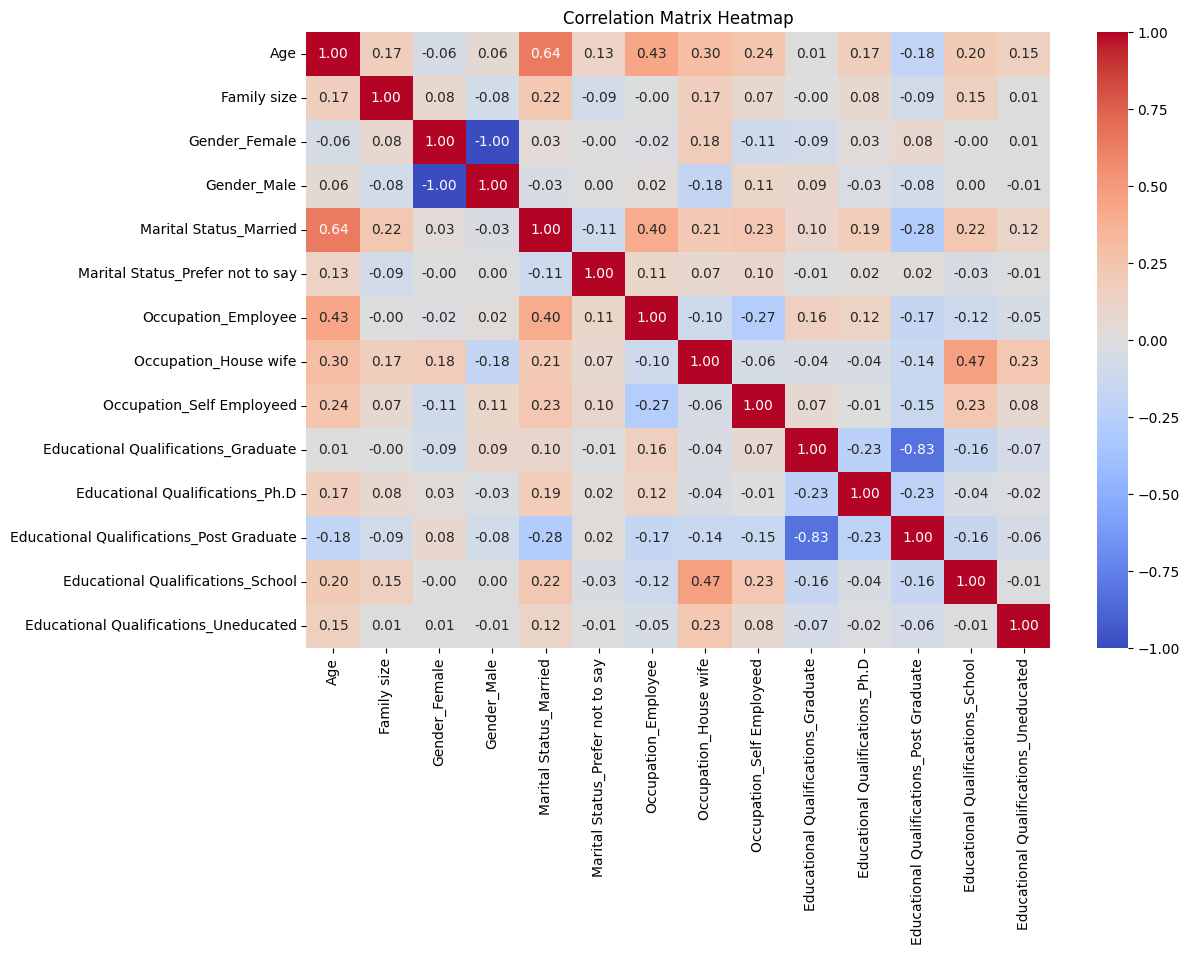

In [5]:
# Descriptive statistics for numeric columns
numeric_stats = selected_df.describe()
print("Descriptive Statistics:\n", numeric_stats)

# Distribution of Age and its impact on Feedback
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', multiple='stack', bins=20)
plt.title('Distribution of Age by Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Proportions of Feedback across different levels of Monthly Income
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Feedback by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()





# **3. Logistic Regression Model**

In [6]:

# Define features and target variable
X = pd.get_dummies(df.drop(columns=['Feedback']), drop_first=True)  # One-hot encoding
y = df['Feedback']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)


# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)





Model Evaluation:
Accuracy: 0.8589743589743589
Precision: 0.8589743589743589
Recall: 1.0
Confusion Matrix:
 [[ 0 11]
 [ 0 67]]


# **4. Data Analysis and Visualization**


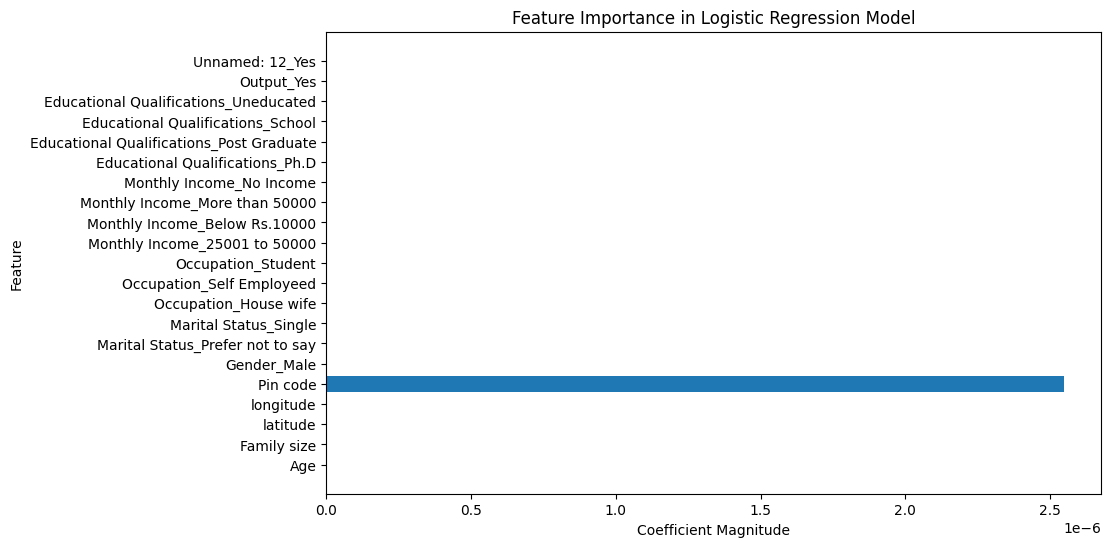

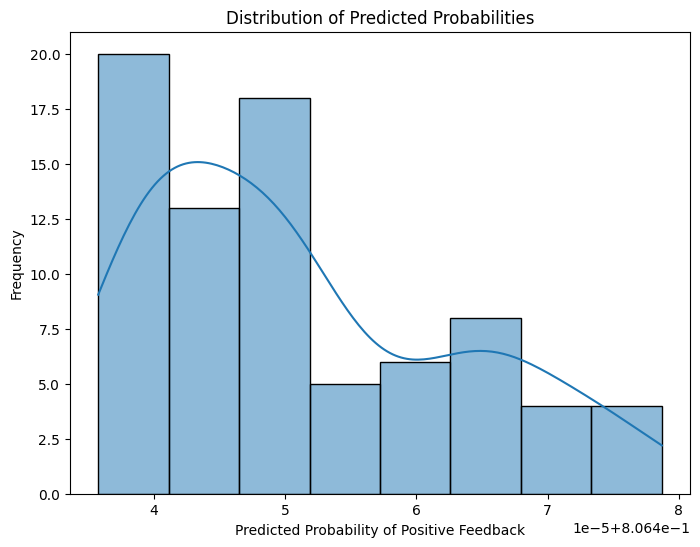

In [7]:
# Extracting feature coefficients from the model
feature_importance = model.coef_[0]
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


# Predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Plotting distribution of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, kde=True)
plt.xlabel('Predicted Probability of Positive Feedback')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()